# Python 音解析
- 自分用：conda googleの環境でやる
- https://jorublog.site/python-voice-analysis/


In [4]:
import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [3]:
# ffmpegを使ってmp4からwavを作る
# !ffmpeg -i comparison.mp4  -ac 2 -ar 44100 -vn comparison_audio.wav
# !ffmpeg -i videos/shift_noring.mp4  -ac 2 -ar 44100 -vn videos/shift_noring_audio.wav
#!ffmpeg -i videos/shift_withring.mp4  -ac 2 -ar 44100 -vn videos/shift_withring_audio.wav

ffmpeg version 3.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 7.2.0 (GCC)
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-bzlib --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-cuda --enable-cuvid --enable-d3d11va --enable-nvenc --enable-dxva2 --enable-avisynth --enable-libmfx
  libavutil      55. 78.100 / 55. 78.100
  libavcodec     57.107.100 / 57.107.100
  libavformat    57. 83.100 / 57. 83.100
  libavdevice    57. 10.100 / 57. 10.100
  libavfilter     6.107.100 /  6.107.100
  libswscale      4.  8.100 /  4.  8.100
  libswresampl

In [23]:
#音声ファイル読み込み
wav_filename = "videos/shift_noring_audio.wav"
rate1, data1 = scipy.io.wavfile.read(wav_filename)

wav_filename = "videos/shift_withring_audio.wav"
rate2, data2 = scipy.io.wavfile.read(wav_filename)

#縦軸（振幅）の配列を作成   #16bitの音声ファイルのデータを-1から1に正規化
data1 = data1 / 32768
data2 = data2 / 32768

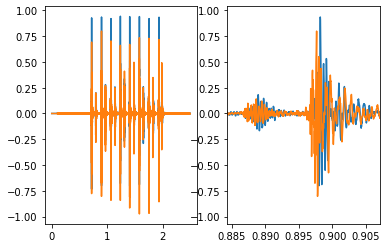

In [24]:
##### 音声データをそのまま表示する #####

#横軸（時間）の配列を作成　　#np.arange(初項, 等差数列の終点, 等差)
time1 = np.arange(0, data1.shape[0]/rate1, 1/rate1)  
#データプロット
plt.figure()
plt.subplot(1,2,1)
plt.plot(time1, data1)
# 拡大 Plot
plt.subplot(1,2,2)
plt.plot(time1, data1)
plt.xlim(39000/rate1, 40000/rate1)
plt.show()

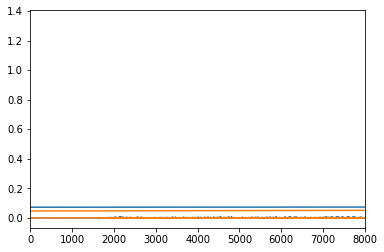

In [29]:
##### 周波数成分を表示する #####
def showfft(data,rate):
    #縦軸：dataを高速フーリエ変換する（時間領域から周波数領域に変換する）
    fft_data = np.abs(np.fft.fft(data))    
    #横軸：周波数の取得　　#np.fft.fftfreq(データ点数, サンプリング周期)
    freqList = np.fft.fftfreq(data.shape[0], d=1.0/rate)  
    #データプロット
    plt.plot(freqList, fft_data)
    plt.xlim(0, 8000) #0～8000Hzまで表示
    plt.show()

showfft(data1,rate1)

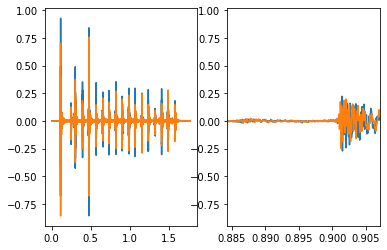

In [26]:
##### 音声データをそのまま表示する #####

#横軸（時間）の配列を作成　　#np.arange(初項, 等差数列の終点, 等差)
time2 = np.arange(0, data2.shape[0]/rate2, 1/rate2)  
#データプロット
plt.figure()
plt.subplot(1,2,1)
plt.plot(time2, data2)
# 拡大 Plot
plt.subplot(1,2,2)
plt.plot(time2, data2)
plt.xlim(39000/rate2, 40000/rate2)
plt.show()

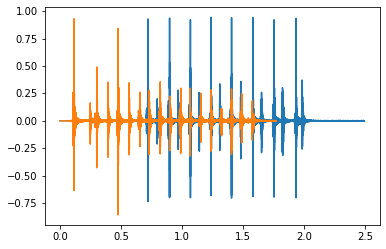

In [27]:
plt.figure()
plt.plot(time1,data1[:,0])
plt.plot(time2,data2[:,0])

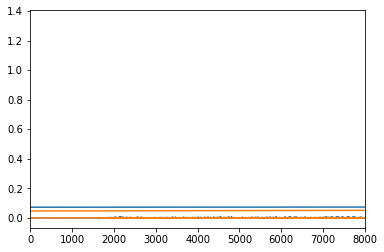

In [30]:
showfft(data1,rate1)

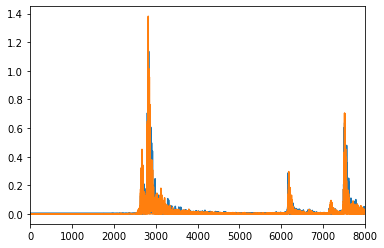

In [28]:
showfft(data2,rate2)

TODOS
- data1と2の絶対値は参考になるのか？
- 波形のところを合わせたい
- FFTの違いが出るのはなぜ？
